Kmeans clustering analysis

In [2]:
from sklearn.cluster import KMeans
from matplotlib import pyplot as plt



In [3]:
import pandas as pd

In [64]:
import numpy as np
import sys

In [34]:
emb = pd.read_csv('C:\\Users\\tsun04\\event_sequence_embedding\\src\\output\\gensim-model.txt',sep='\s+',skiprows=1,header=None)

In [35]:
emb.head()

,0,1,2,3,4,5,6,7,8,9,...,41,42,43,44,45,46,47,48,49,50
0,hub002,0.387958,-0.433686,0.116052,0.270919,-0.508688,-1.277355,0.957649,-0.160524,-0.759310,...,-1.573134,-0.997812,-0.503230,-1.665829,-1.003759,1.312106,-0.401629,-0.879317,1.685839,1.900619
1,hub001,-1.550994,1.262790,1.148367,-1.597159,-1.709167,-0.830279,0.246616,-1.556542,0.955347,...,-0.137792,0.064304,-1.359878,-1.436604,-0.382063,1.427274,1.465145,-1.560051,-0.450292,0.855712
2,mob109,4.516953,1.379252,0.905621,-0.758841,0.064363,-1.582186,-0.509536,-2.007313,0.293143,...,-1.774049,-0.145622,-0.974632,-2.290913,0.377963,0.857043,0.211356,-0.733519,1.956778,-0.087473
3,mob027,0.279536,0.954518,1.990872,-1.732767,-1.453292,-2.164920,0.485919,-2.343150,-0.137810,...,-2.041324,-2.914654,-1.122851,0.906044,-0.542814,2.009878,-1.393047,-1.312156,1.907146,-0.505876
4,mob024,2.913203,0.758204,0.726812,-2.692184,-0.677811,-3.077484,1.715165,0.210624,-2.845900,...,-1.287794,-1.866533,-3.125331,-1.248618,0.417495,-0.739190,-1.403909,-1.583650,-0.028004,0.412168


In [26]:
emb.shape

(1035, 2)

In [47]:
emb.iloc[:,1:51].head()

,1,2,3,4,5,6,7,8,9,10,...,41,42,43,44,45,46,47,48,49,50
0,0.387958,-0.433686,0.116052,0.270919,-0.508688,-1.277355,0.957649,-0.160524,-0.759310,-0.255395,...,-1.573134,-0.997812,-0.503230,-1.665829,-1.003759,1.312106,-0.401629,-0.879317,1.685839,1.900619
1,-1.550994,1.262790,1.148367,-1.597159,-1.709167,-0.830279,0.246616,-1.556542,0.955347,1.004400,...,-0.137792,0.064304,-1.359878,-1.436604,-0.382063,1.427274,1.465145,-1.560051,-0.450292,0.855712
2,4.516953,1.379252,0.905621,-0.758841,0.064363,-1.582186,-0.509536,-2.007313,0.293143,-0.661588,...,-1.774049,-0.145622,-0.974632,-2.290913,0.377963,0.857043,0.211356,-0.733519,1.956778,-0.087473
3,0.279536,0.954518,1.990872,-1.732767,-1.453292,-2.164920,0.485919,-2.343150,-0.137810,-0.347378,...,-2.041324,-2.914654,-1.122851,0.906044,-0.542814,2.009878,-1.393047,-1.312156,1.907146,-0.505876
4,2.913203,0.758204,0.726812,-2.692184,-0.677811,-3.077484,1.715165,0.210624,-2.845900,0.264802,...,-1.287794,-1.866533,-3.125331,-1.248618,0.417495,-0.739190,-1.403909,-1.583650,-0.028004,0.412168


In [49]:
X=emb.iloc[:,1:51]

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=10, n_init=10, n_jobs=1, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)

In [106]:
distorsions = []
for k in range(10, 100):
    kmeans = KMeans(n_clusters=k,random_state=0)
    kmeans.fit(X)
    distorsions.append(kmeans.inertia_)

Text(0.5,1,'Elbow curve')

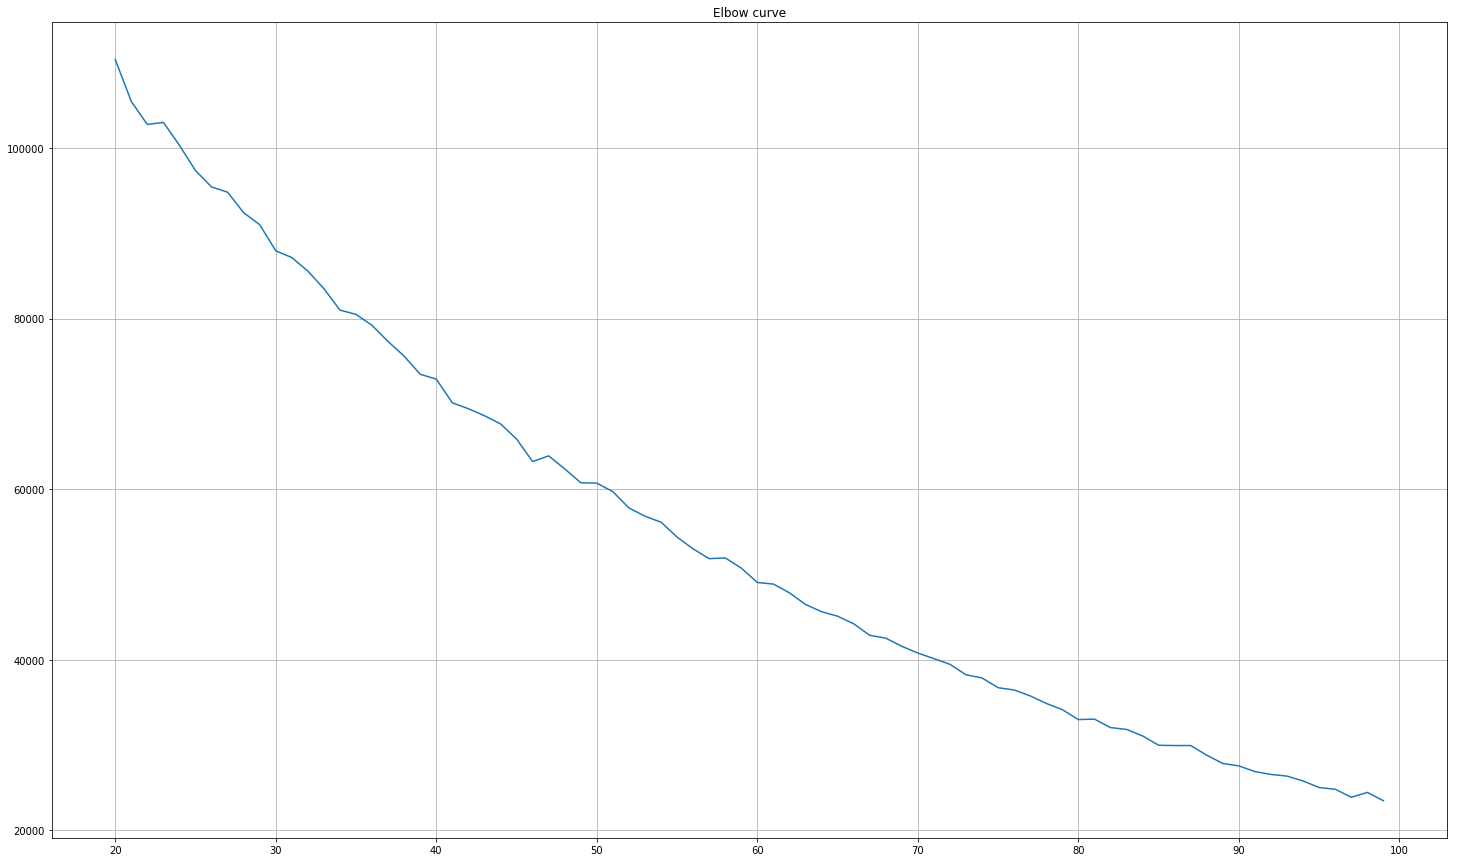

In [105]:


fig = plt.figure(figsize=(25, 15))
plt.plot(range(20, 100), distorsions)
plt.grid(True)
plt.title('Elbow curve')

In [56]:
kmeans = KMeans(n_clusters=10,random_state=0).fit(X)

In [57]:
y=kmeans.predict(X)

In [65]:
np.set_printoptions(threshold=sys.maxsize)

In [68]:
emb['cluster_no'] = pd.Series(y, index=emb.index)

In [75]:
emb.iloc[:,[0,51]].sort_values(by=['cluster_no'])

,0,cluster_no
0,hub002,0
681,sr236,0
682,sr028,0
683,sr146,0
684,opt269,0
685,act059,0
686,act088,0
687,sr386,0
688,ivr056,0
689,sr363,0


In [ ]:
from sklearn.manifold import TSNE


In [ ]:
tsne = TSNE(n_components=2, init='random', random_state=0)
tsneXY= tsne.fit_transform(X)

In [107]:
# Compute the clusters
kmeans = KMeans(n_clusters=20, random_state=0)
clusters = kmeans.fit_predict(X)

In [100]:
digits_proj[:,0]

array([ 2.28895073e+01,  2.58650856e+01,  2.08697128e+01,  3.40693054e+01,
        2.20529900e+01,  2.08465900e+01,  6.61164904e+00,  2.60580254e+01,
        2.56543407e+01,  2.48992920e+01,  2.65268898e+01,  3.55606689e+01,
       -2.09580002e+01,  3.43069696e+00, -2.06613407e+01, -4.56921911e+00,
       -1.31483049e+01,  3.07570915e+01, -1.70006161e+01, -6.10363054e+00,
       -3.65703506e+01, -3.14003849e+01, -1.62629890e+01,  3.27658577e+01,
       -2.65698795e+01, -2.88561440e+01, -8.92997074e+00, -2.89499149e+01,
       -2.68825436e+00, -3.26249504e+01, -5.56625252e+01, -2.59286842e+01,
        4.40511703e+01,  3.57937012e+01, -3.11907959e+00, -4.44326735e+00,
       -2.40720558e+01, -8.50249290e+00, -5.11442137e+00, -2.26153221e+01,
       -1.25474524e+00, -2.84650555e+01,  8.63716221e+00,  2.92432652e+01,
        3.55067749e+01,  7.91859210e-01, -8.43980217e+00, -1.14195297e+02,
        3.79893708e+00,  3.44988084e+00,  3.87074928e+01, -1.83105640e+01,
        2.05302391e+01, -

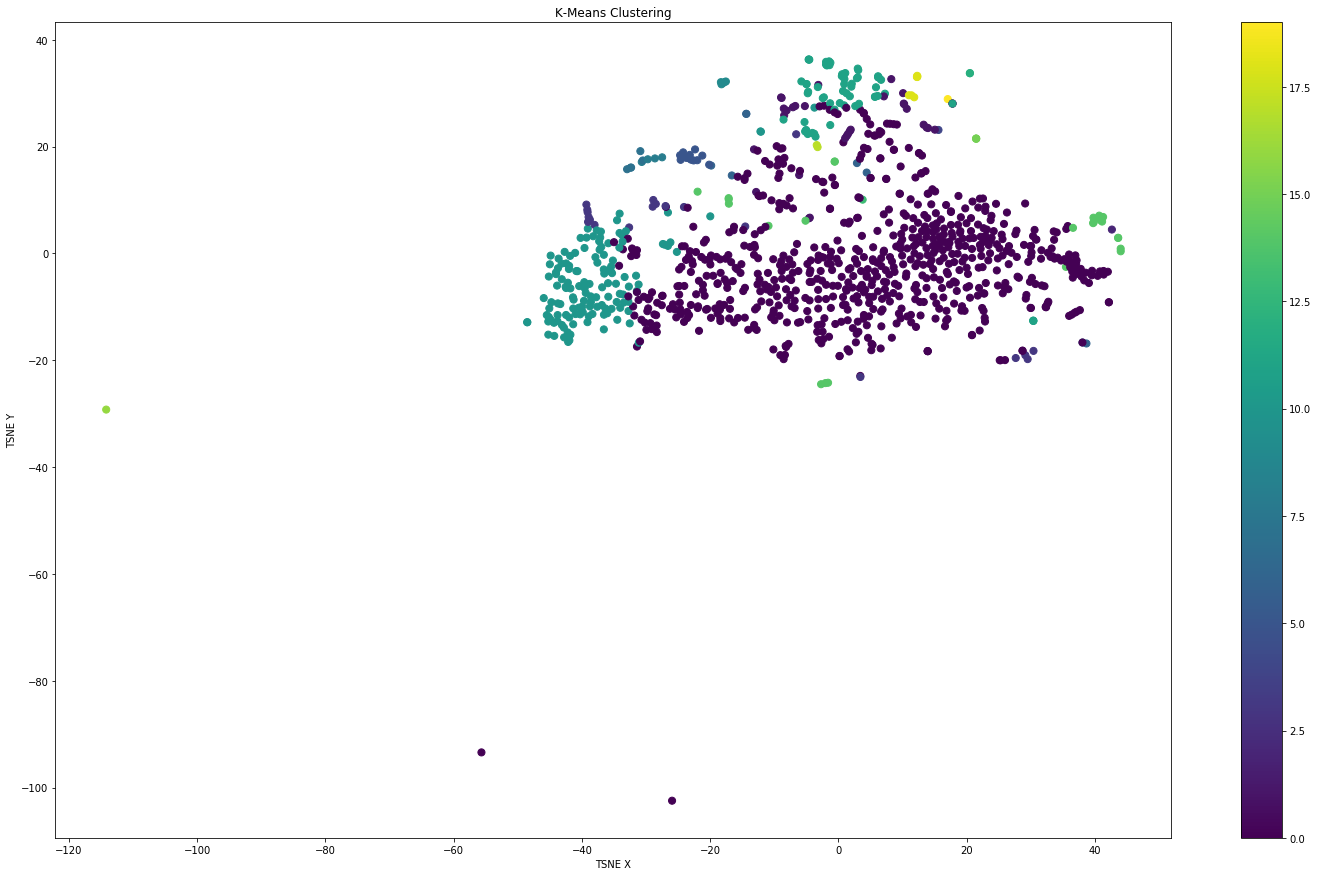

In [108]:

fig = plt.figure(figsize=(25, 15))
ax = fig.add_subplot(111)
scatter = ax.scatter(digits_proj[:,0],digits_proj[:,1],
                     c=clusters,s=50)
ax.set_title('K-Means Clustering')
ax.set_xlabel('TSNE X')
ax.set_ylabel('TSNE Y')
plt.colorbar(scatter)

In [109]:


# Permute the labels
'''
for i in range(10):
    mask = (clusters == i)
    labels[mask] = mode(X[mask])[0]

'''

'\nfor i in range(10):\n    mask = (clusters == i)\n    labels[mask] = mode(X[mask])[0]\n\n'

In [84]:
# Compute the accuracy
#accuracy_score(X, labels)